In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pprint
import matplotlib.pyplot as plt

In [4]:
#####################################  LOADING TRAIN X DATA   ####################################
f_x = open('./Data/train_x.txt','r')

X_train = np.zeros((64713,482))

line1 = f_x.readline()
counter = 0


while True:
    line1 = f_x.readline()
    
    if not line1:
        break
        
    counter+=1
    
    arr = line1.strip().split(' ')
    
    for i in range(len(arr)):
        index = int(arr[i].split(':')[0])
        value = int(float(arr[i].split(':')[1]))
        
        X_train[counter-1][index] = value
        
#####################################  LOADING TRAIN Y DATA   ####################################

f_y = open('./Data/train_y.txt','r')

Y_train = []

while True:
    line2 = f_y.readline()
    
    if not line2:
        break
        
    Y_train.append(int(line2))

Y_train = np.asarray(Y_train)


#####################################  LOADING VAL X DATA   ####################################

val_x = open('./Data/valid_x.txt','r')

X_val = np.zeros((21572,482))

line1 = val_x.readline()
counter = 0


while True:
    line1 = val_x.readline()
    
    if not line1:
        break
        
    counter+=1
    
    arr = line1.strip().split(' ')
    
    for i in range(len(arr)):
        index = int(arr[i].split(':')[0])
        value = int(float(arr[i].split(':')[1]))
        
        X_val[counter-1][index] = value
        
#####################################  LOADING VAL Y DATA   ####################################

val_y = open('./Data/valid_y.txt','r')

Y_val = []

while True:
    line2 = val_y.readline()
    
    if not line2:
        break
        
    Y_val.append(int(line2))

Y_val = np.asarray(Y_val)


#####################################  LOADING TEST X DATA   ####################################

test_x = open('./Data/test_x.txt','r')

X_test = np.zeros((21571,482))

line = test_x.readline()
counter = 0


while True:
    line1 = test_x.readline()
    
    if not line1:
        break
        
    counter+=1
    
    arr = line1.strip().split(' ')
    
    for i in range(len(arr)):
        index = int(arr[i].split(':')[0])
        value = int(float(arr[i].split(':')[1]))
        
        X_test[counter-1][index] = value
        
#####################################  LOADING TEST Y DATA   ####################################

test_y = open('./Data/test_y.txt','r')

Y_test = []

while True:
    line2 = test_y.readline()
    
    if not line2:
        break
        
    Y_test.append(int(line2))

Y_test = np.asarray(Y_test)

In [16]:
rfc = RandomForestClassifier(oob_score=True)
parameters = {'n_estimators':[50, 150, 250, 350, 450], 'max_features':[0.1, 0.3, 0.5, 0.7, 0.9, 1.0], 'min_samples_split':[2, 4, 6, 8, 10]}

In [17]:
def scorer(estimator,X,Y):
    return estimator.oob_score_

In [20]:
search = GridSearchCV(estimator=rfc, param_grid=parameters, scoring=scorer,n_jobs=-1,cv=2)
search.fit(X_train, Y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=None,
                                 

In [23]:
res = search.predict(X_train)
correct = 0

for i in range(len(res)):
    if res[i]==Y_train[i]:
        correct+=1
        
print('Training Accuracy is ', (correct/len(res))*100,'%')

Training Accuracy is  87.34720998871943 %


In [22]:
res = search.predict(X_val)
correct = 0

for i in range(len(res)):
    if res[i]==Y_val[i]:
        correct+=1
        
print('Val Accuracy is ', (correct/len(res))*100,'%')

Val Accuracy is  80.61375857593175 %


In [24]:
res = search.predict(X_test)
correct = 0

for i in range(len(res)):
    if res[i]==Y_test[i]:
        correct+=1
        
print('Test Accuracy is ', (correct/len(res))*100,'%')

Test Accuracy is  80.73802790783922 %


In [ ]:
print(clf.best_params_)

In [ ]:
estimator = clf.best_estimator_

In [ ]:
print(estimator.oob_score_) #oob accuracy

In [8]:
train_acc_estimators = []
val_acc_estimators = []
test_acc_estimators = []

n_estimator = [50, 150, 250, 350, 450]
for i in range(len(n_estimator)):
    estimator = RandomForestClassifier(n_estimators=n_estimator[i], oob_score=True, min_samples_split=10, max_features=0.1, n_jobs=-1)
    estimator.fit(X_train, Y_train)
    train_acc_estimators.append(estimator.score(X_train, Y_train))
    val_acc_estimators.append(estimator.score(X_val, Y_val))
    test_acc_estimators.append(estimator.score(X_test, Y_test))

    print(n_estimator[i], estimator.oob_score_, test_acc_estimators[i], val_acc_estimators[i], train_acc_estimators[i])

50 0.8061131457357873 0.8090955449446016 0.8043296866308177 0.8727303632964011
150 0.8089410164881863 0.8072412034676185 0.8050250324494715 0.8733948356589866
250 0.8100845270656591 0.8084001668907329 0.8065084368625997 0.8738738738738738
350 0.8095745831594888 0.8079829400584118 0.8066938624142407 0.8737038925718171
450 0.8101617912938668 0.8086783181122804 0.8064620804746894 0.8737811568000248


In [11]:
train_acc_max = []
val_acc_max = []
test_acc_max = []

max_feature = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

for i in range(len(max)):
    estimator = RandomForestClassifier(n_estimators=350, oob_score=True, min_samples_split=10, max_features=max_feature[i], n_jobs=-1)
    estimator.fit(X_train, Y_train)
    train_acc_max.append(estimator.score(X_train, Y_train))
    val_acc_max.append(estimator.score(X_val, Y_val))
    test_acc_max.append(estimator.score(X_test, Y_test))

    print(max_feature[i], estimator.oob_score_, test_acc_max[i], val_acc_max[i], train_acc_max[i])

0.1 0.8105172067436218 0.8080292985953363 0.8063230113109586 0.8734720998871942
0.3 0.8089410164881863 0.8074266376153169 0.8060912293714074 0.881090352788466
0.5 0.8091573563271677 0.8071948449306939 0.805117745225292 0.8840727519972803
0.7 0.8089564693338278 0.8057577302860321 0.8047932505099202 0.8863134146153014
0.9 0.8077820530650719 0.8046451253998423 0.8050713888373818 0.8869315284409625
1.0 0.806901240863505 0.8041815400305966 0.8040979046912664 0.8875032837296988


In [26]:
train_acc_split = []
val_acc_split = []
test_acc_split = []

split = [2, 4, 6, 8, 10]

for i in range(len(split)):
    estimator = RandomForestClassifier(n_estimators=350, oob_score=True, min_samples_split=split[i], max_features=0.1, n_jobs=-1)
    estimator.fit(X_train, Y_train)
    train_acc_split.append(estimator.score(X_train, Y_train))
    val_acc_split.append(estimator.score(X_val, Y_val))
    test_acc_split.append(estimator.score(X_test, Y_test))

    print(split[i], estimator.oob_score_, test_acc_split[i], val_acc_split[i], train_acc_split[i])

2 0.8018636131843679 0.7984330814519494 0.7980715742629334 0.9127223278166674
4 0.8067158067158067 0.8033007278290297 0.8012701650287409 0.9005454854511459
6 0.8079365815214872 0.80654582541375 0.8026608566660486 0.8882295674748505
8 0.809404601857432 0.8079365815214872 0.8054422399406638 0.8799313893653516
10 0.810285414058999 0.8083538083538083 0.8069720007417022 0.8737811568000248


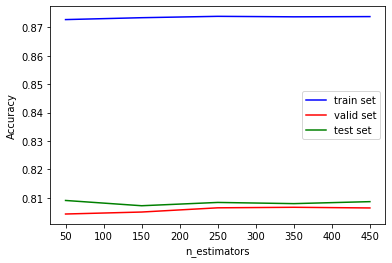

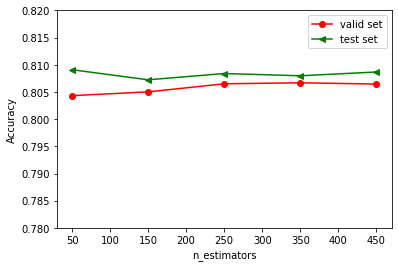

In [40]:
plt.figure()
plt.plot(n_estimator, train_acc_estimators[:5], label='train set',color='b')
plt.plot(n_estimator, val_acc_estimators[:5], label='valid set',color='r')
plt.plot(n_estimator,test_acc_estimators[:5], label='test set',color='g')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.figure()
plt.plot(n_estimator, val_acc_estimators[:5], label='valid set',color='r',marker='o')
plt.plot(n_estimator,test_acc_estimators[:5], label='test set',color='g',marker='<')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.ylim(0.78,0.82)
plt.legend()
plt.show()

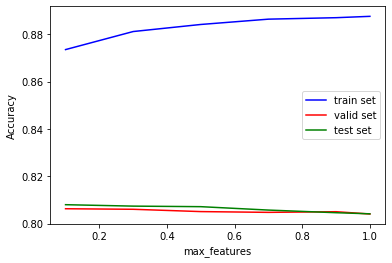

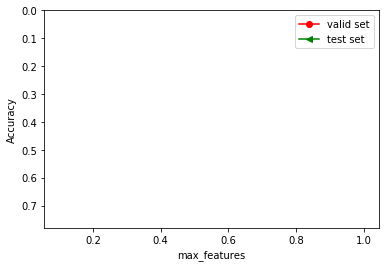

In [35]:
plt.figure()
plt.plot(max_feature, train_acc_max, label='train set',color='b')
plt.plot(max_feature, val_acc_max, label='valid set',color='r')
plt.plot(max_feature,test_acc_max, label='test set',color='g')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(max_feature, val_acc_max, label='valid set',color='r',marker='o')
plt.plot(max_feature,test_acc_max, label='test set',color='g',marker='<')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
# plt.ylim(0.78,0,82)
plt.legend()
plt.show()

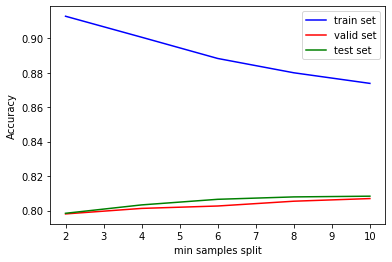

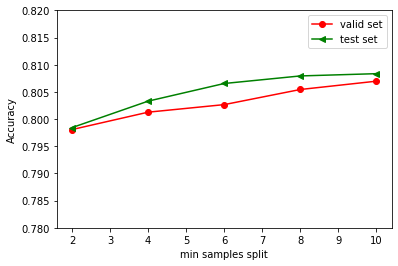

In [38]:
plt.figure()
plt.plot(split, train_acc_split, label='train set',color='b')
plt.plot(split, val_acc_split, label='valid set',color='r')
plt.plot(split,test_acc_split, label='test set',color='g')
plt.xlabel('min samples split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(split, val_acc_split, label='valid set',color='r',marker='o')
plt.plot(split,test_acc_split, label='test set',color='g',marker='<')
plt.xlabel('min samples split')
plt.ylabel('Accuracy')
plt.ylim(0.78,0.82)
plt.legend()
plt.show()